In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import pandas as pd
%matplotlib inline
sns.set_context("poster")
sns.set_color_codes()


In [30]:
#load the parameters, and their short int feats?
parameters = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_145.csv", index_col =0 )
parameters


,ID,Gamma,Location,Alpha
0,1007.0,2.614027e+00,4.447527e+00,1.283371e+00
1,1021.0,3.269655e+00,4.989150e+00,1.129664e+00
2,1025.0,2.249906e+00,4.965337e+00,9.385662e-01
3,1041.0,1.856930e+00,4.863439e+00,9.722765e-01
4,10518.0,1.596694e+00,5.781111e+00,7.619535e-01
5,1052.0,3.568372e+00,3.971006e+00,1.352695e+00
6,1107.0,1.700066e+00,4.974522e+00,8.059587e-01
7,1120.0,3.066950e+00,3.849859e+00,1.290300e+00
8,1124.0,1.130110e+00,3.182193e+00,8.164366e-01
9,1128.0,2.376286e+00,3.722360e+00,1.693260e+00


In [3]:
short_feats = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col =0 )
short_feats.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
0,0000000.bin,10000.0,1.346025e-08,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,...,4.410404,0.297364,0.016641,0.339655,0.010871,2.681898e-11,0.395531,0.0,1.235644e+07,1.099985e-04
1,0000001.bin,10000.0,8.934681e-10,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,...,0.588028,0.115674,0.039718,0.251880,0.137917,-9.314702e-11,0.403877,0.0,1.348749e+05,1.388587e-08
2,0000002.bin,10000.0,3.169983e-08,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,...,0.875622,0.038930,0.002380,0.026117,0.007227,-4.095504e-11,0.397334,0.0,1.276381e+04,3.048261e-04
3,0000003.bin,10000.0,6.097589e-10,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,...,9.650551,0.514386,0.003658,0.301072,0.279903,-7.257099e-12,0.391764,1.0,1.000000e+09,6.492574e-10
4,0000004.bin,10000.0,5.951220e-03,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,...,0.154157,0.496372,0.248052,1.358604,0.261358,-2.610208e-08,0.402905,0.0,8.791888e+01,9.336734e-07


In [4]:
subsystem = parameters["ID"].values.astype(int)
#print subsystem
sub_short = short_feats.loc[subsystem]
sub_short.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
1007,0001007.bin,10000.0,5.206029e-08,26.732355,0.043882,26.638832,26.835809,22.424908,0.341923,21.606912,...,0.499930,0.039808,0.016937,0.857421,0.714777,-1.082651e-08,0.388264,0.0,1.740364e+05,1.526402e-06
1021,0001021.bin,10000.0,4.398308e-09,8.336482,0.024231,8.275415,8.384433,12.815548,0.038202,12.731072,...,1.145887,0.367925,0.174110,0.029881,0.001526,-3.842643e-12,0.383372,0.0,2.689650e+06,1.961156e-07
1025,0001025.bin,10000.0,7.781939e-09,7.685149,0.040514,7.621851,7.766875,20.608268,0.027135,20.550142,...,0.214459,0.010761,0.000136,0.375722,0.365670,2.354612e-12,0.382403,0.0,6.744500e+05,9.745464e-10
1041,0001041.bin,10000.0,1.961802e-09,23.388121,0.004581,23.377418,23.395434,7.072915,0.105877,6.906414,...,9.175108,1.434662,0.050702,0.712976,0.578283,2.174409e-12,0.393527,0.0,7.144115e+05,1.061513e-07
10518,0010518.bin,10000.0,8.140560e-09,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,...,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12,0.314230,0.0,9.271272e+06,4.160501e-07


In [5]:
drop_feats = ["runstring", "t_final_short", "Rel_Eerr_short", "wall_time", "Stable", "instability_time", "Rel_Eerr"]
trimmed_sub_short = sub_short.drop(drop_feats, axis = 1)
trimmed_sub_short.head()

,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23,avg_a1,std_a1,...,min_eH3,avg_iH3,std_iH3,max_iH3,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope
1007,26.732355,0.043882,26.638832,26.835809,22.424908,0.341923,21.606912,23.122101,1.000000,0.000025,...,16.086189,0.895896,0.381169,1.664714,0.499930,0.039808,0.016937,0.857421,0.714777,-1.082651e-08
1021,8.336482,0.024231,8.275415,8.384433,12.815548,0.038202,12.731072,12.902652,0.999974,0.000019,...,0.019606,4.727438,2.237120,8.527448,1.145887,0.367925,0.174110,0.029881,0.001526,-3.842643e-12
1025,7.685149,0.040514,7.621851,7.766875,20.608268,0.027135,20.550142,20.653537,0.999932,0.000055,...,7.543279,0.221992,0.002801,0.224249,0.214459,0.010761,0.000136,0.375722,0.365670,2.354612e-12
1041,23.388121,0.004581,23.377418,23.395434,7.072915,0.105877,6.906414,7.216513,0.999999,0.000008,...,4.047720,10.041995,0.354888,10.388951,9.175108,1.434662,0.050702,0.712976,0.578283,2.174409e-12
10518,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,21.200429,1.000005,0.000028,...,7.911484,3.910034,0.017809,3.925605,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12


In [6]:
# could you cluseter the systems?
import hdbscan

In [ ]:

'''
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})
'''

0.0242421627045


(0, 10)

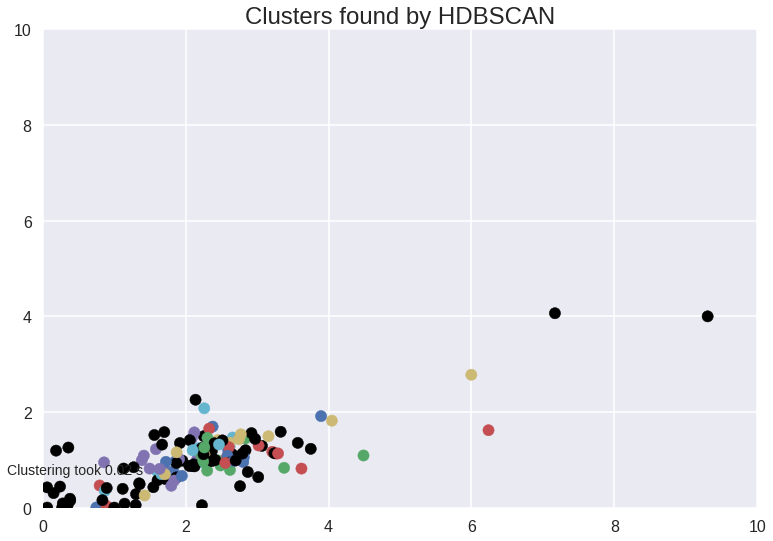

In [29]:
start_time = time.time()
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)# (*args, **kwds).fit_predict(data)
labels = clusterer.fit_predict(trimmed_sub_short)
end_time = time.time()
print end_time - start_time

palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.scatter(parameters["Gamma"].values, parameters["Alpha"].values,c=colors)
#plt.scatter(trimmed_sub_short["avg_beta12"].values, trimmed_sub_short["avg_beta23"].values,c=colors)

frame = plt.gca()
#frame.axes.get_xaxis().set_visible(False)
#frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str("HDBSCAN")), fontsize=24)
plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
plt.ylim([0,10])
plt.xlim([0,10])


In [34]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    plt.scatter(X[:, 0], X[:, 1],    c = colors)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing t-SNE embedding


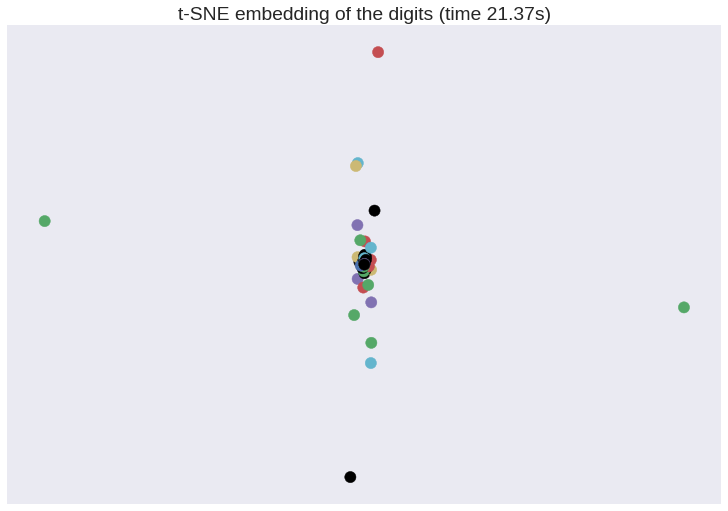

In [35]:
#try tsne
from sklearn import manifold
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=10, init='pca', random_state=0)
t0 = time.time()
X_tsne = tsne.fit_transform(trimmed_sub_short)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time.time() - t0))

plt.show()

Computing t-SNE embedding


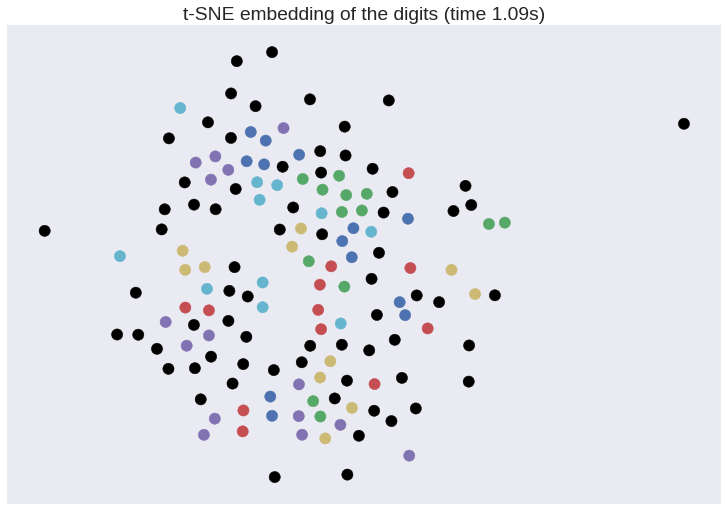

In [36]:
#try tsne
from sklearn import manifold
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time.time()
X_tsne = tsne.fit_transform(trimmed_sub_short)
plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" %
               (time.time() - t0))
plt.show()

In [ ]:
ffrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrom